# **Regression Models on Housing Dataset**

Features:<br>
CRIM: per capita crime rate by town<br>
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.<br>
INDUS: proportion of non-retail business acres per town<br>
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
NOX: nitric oxides concentration (parts per 10 million)<br>
RM: average number of rooms per dwelling<br>
AGE: proportion of owner-occupied units built prior to 1940<br>
DIS: weighted distances to five Boston employment centres<br>
RAD: index of accessibility to radial highways<br>
TAX: full-value property-tax rate per $10,000<br>
PTRATIO: pupil-teacher ratio by town<br>
B: 1000(Bk - 0.63)^2 where Bk is the proportion of b. by town<br>
LSTAT: % lower status of the population<br>
Target:<br>
MEDV: Median value of owner-occupied homes in $1000's

# 1. Load the Dataset

In [ ]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'] # Add column name
df = pd.read_csv(url, sep=r'\s+', header=None, names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.isna().sum()  # Sum of null value in dataset

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


# 2. Split the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('MEDV', axis=1)  # Drop target column
y = df['MEDV']

In [ ]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display the shape of the training and test sets
(X_train.shape, X_test.shape)

((404, 13), (102, 13))

# 3. Train Models

In [ ]:
# Train Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Initialize the models
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

In [ ]:
# Train the models on the training data
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

# 4. Evaluate Models

In [ ]:
# Evaluate Models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions on the test set
lr_pred = lr_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

In [ ]:
# Linear Regression Metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)

# Ridge Regression Metrics
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

# Lasso Regression Metrics
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mae = mean_absolute_error(y_test, lasso_pred)

# 5. Compare Results

In [ ]:
# Create a DataFrame to display metrics
results = pd.DataFrame({
    'Model': ['MSE', 'RMSE', 'R2 Score', 'MAE'],
    'Linear Regression': [lr_metrics[0], lr_metrics[1], lr_metrics[2], lr_metrics[3]],
    'Ridge Regression': [ridge_metrics[0], ridge_metrics[1], ridge_metrics[2], ridge_metrics[3]],
    'Lasso Regression': [lasso_metrics[0], lasso_metrics[1], lasso_metrics[2], lasso_metrics[3]]
})

print(results)

      Model  Linear Regression  Ridge Regression  Lasso Regression
0       MSE          24.291119         24.477191         25.155594
1      RMSE           4.928602          4.947443          5.015535
2  R2 Score           0.668759          0.666222          0.656971
3       MAE           3.189092          3.132947          3.145240


# 6. Plot Predicted vs Actual

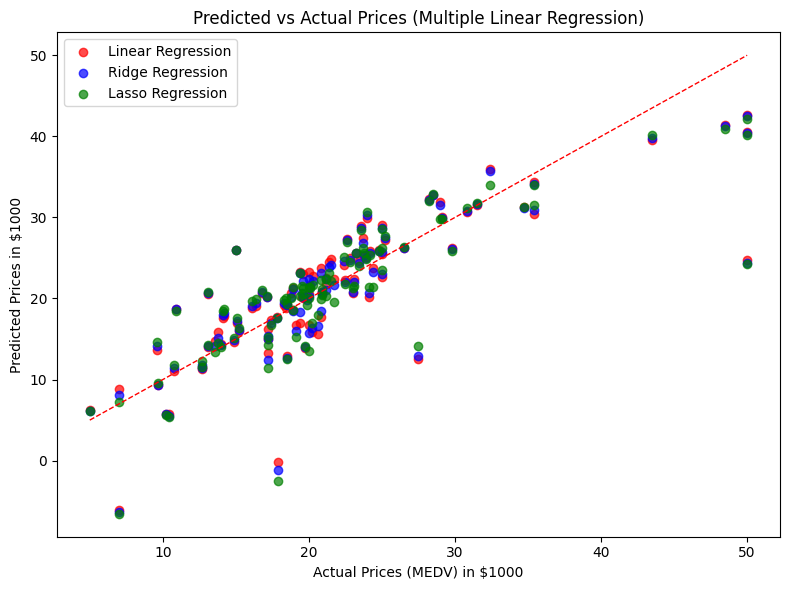

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(y_test, lr_pred, color="red", alpha=0.7, label="Linear Regression")
plt.scatter(y_test, ridge_pred, color="blue", alpha=0.7, label="Ridge Regression")
plt.scatter(y_test, lasso_pred, color="green", alpha=0.7, label="Lasso Regression")

# Labels
plt.xlabel("Actual Prices (MEDV) in $1000")
plt.ylabel("Predicted Prices in $1000")
plt.title("Predicted vs Actual Prices (Multiple Linear Regression)")

# Prediction line
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],
    color="red", linestyle="--", linewidth=1)

# Plot
plt.legend()
plt.tight_layout()
plt.show()